# A Numerical Tour

**Remark:** The next cell makes sure that the parent directory is on the Python path, so we can import its scripts as Python modules

In [51]:
import os, sys
cmd_folder = os.path.realpath(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)

In [52]:
import utils
import helper
import plotting

import numpy as np
import matplotlib as mpl
import graphs_signals as gs
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from glob import glob, iglob
from matplotlib import rcParams
from plotting import plot_graph

plt.style.use('thesis.mplstyle')
helper.set_pgf_preamble()

%matplotlib inline

In [53]:
experiment_path = 'data/curated/'
save_path = 'figures/'
epfl_colors = utils.load_obj('epfl_colors_hex.pkl')

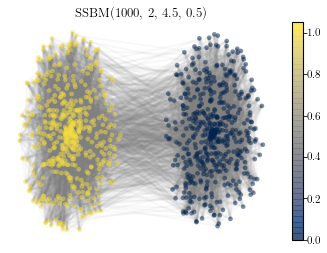

In [54]:
fn = "pt_2ssbm_unif_samp_tv_interp.pkl"
experiment = utils.load_obj(os.path.join(experiment_path, fn))

n_vertices = experiment['n_vertices']
n_communities = experiment['n_communities']
a = np.median(experiment['rows'])
b = experiment['b']

graph, indicator_vectors = gs.ssbm(n_vertices, n_communities, a=a, b=b)

fig, ax = plt.subplots(1)
helper.set_cmap('signal')
plotting.plot_graph(graph, indicator_vectors[0,:], ax=ax, colorbar=True, edges=True)
ax.set(title='SSBM({0}, {1}, {2:.1f}, {3:.1f})'.format(n_vertices, n_communities, a, b))
plt.savefig(save_path + '2ssbm.pdf')
plt.show()

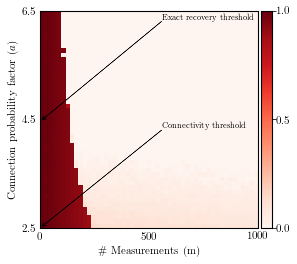

In [55]:
helper.set_cmap() # Reset to default colormap
helper.plot_sbm_pt(experiment, ax=None, with_colorbar=True, with_thresholds=True)
plt.savefig(save_path + 'pt_2ssbm_unif_samp_tv_interp_with_thresholds.pdf')
plt.show()

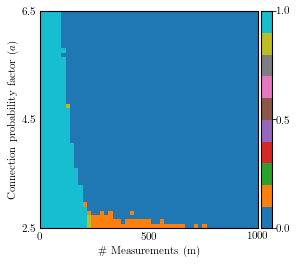

In [56]:
helper.set_cmap('quantized')
helper.plot_sbm_pt(experiment, ax=None, with_colorbar=True, with_thresholds=False)
plt.savefig(save_path + 'pt_2ssbm_unif_samp_tv_interp_quantized.pdf')
plt.show()

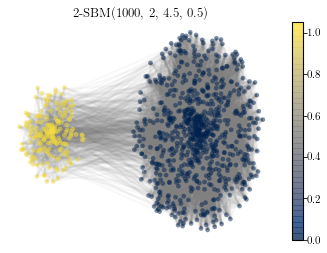

In [57]:
fn = "pt_2sbm_unif_samp_tv_interp.pkl"
experiment = utils.load_obj(os.path.join(experiment_path, fn))

n_vertices = experiment['n_vertices']
n_communities = experiment['n_communities']
n_vert_per_comm = experiment['n_vertices_per_community']
a = np.median(experiment['rows'])
b = experiment['b']

graph, indicator_vectors = gs.sbm(n_vertices, 
                                  n_communities=n_communities,
                                  n_vert_per_comm=n_vert_per_comm, 
                                  intra_comm_prob=a * np.log(n_vertices) / n_vertices,
                                  inter_comm_prob=b * np.log(n_vertices) / n_vertices)


fig, ax = plt.subplots(1)
helper.set_cmap('signal')
plotting.plot_graph(graph, indicator_vectors[0,:], ax=ax, colorbar=True, edges=True)
ax.set(title='2-SBM({0}, {1}, {2:.1f}, {3:.1f})'.format(n_vertices, n_communities, a, b))
plt.savefig(save_path + '2sbm.pdf')
plt.show()

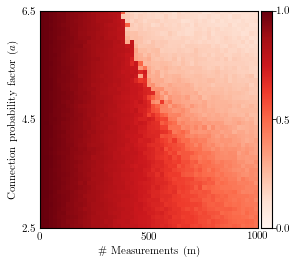

In [58]:
helper.set_cmap() # Reset to default colormap
helper.plot_sbm_pt(experiment, ax=None, with_colorbar=True, with_thresholds=False)
plt.savefig(save_path + 'pt_2sbm_unif_samp_tv_interp.pdf')
plt.show()

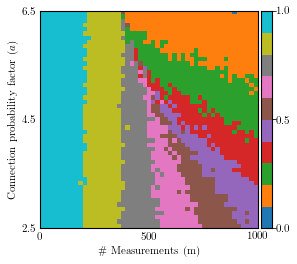

In [59]:
helper.set_cmap('quantized')
helper.plot_sbm_pt(experiment, ax=None, with_colorbar=True, with_thresholds=False)
plt.savefig(save_path + 'pt_2sbm_unif_samp_tv_interp_quantized.pdf')
plt.show()

# TV vs. Dirichlet interpolation for uniform sampling

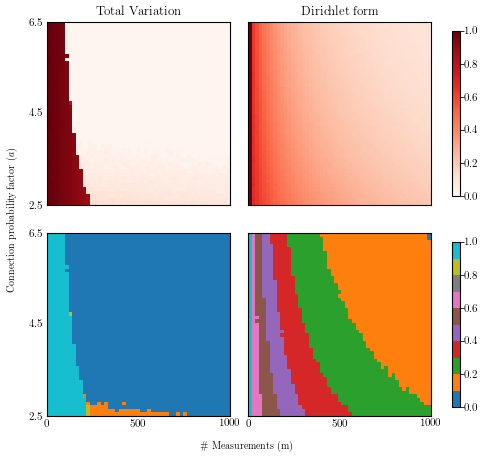

In [60]:
tv_experiment = utils.load_obj(os.path.join(experiment_path, "pt_2ssbm_unif_samp_tv_interp.pkl"))
dirichlet_experiment = utils.load_obj(os.path.join(experiment_path, "pt_2ssbm_unif_samp_dirichlet_interp.pkl"))

n_vertices = tv_experiment['n_vertices']
n_communities = tv_experiment['n_communities']
list_a = tv_experiment['rows']
a = np.median(list_a)
b = tv_experiment['b']

n_rows = 2
n_cols = 2
figsize = (7.4, 7.4)

fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize,
                       sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.1, 'wspace':0.1})

# Plot phase transitions

helper.set_cmap() # Reset to default colormap

helper.plot_sbm_pt(tv_experiment, ax=ax[0,0], with_colorbar=False)
ax[0,0].set(title='Total Variation', ylabel='', xlabel='')

helper.plot_sbm_pt(dirichlet_experiment, ax=ax[0,1], with_colorbar=False)
ax[0,1].set(title='Dirichlet form', ylabel='', xlabel='')

helper.set_cmap('quantized') # Set quantized colormap
 
helper.plot_sbm_pt(tv_experiment, ax=ax[1,0], with_colorbar=False)
ax[1,0].set(title='', ylabel='', xlabel='')

helper.plot_sbm_pt(dirichlet_experiment, ax=ax[1,1], with_colorbar=False)
ax[1,1].set(title='', ylabel='', xlabel='')

# Add colorbars
norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=False)
cmap = mpl.cm.get_cmap(name='Reds')
cb = plt.colorbar(mappable=mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
                  ax=ax[0,:],
                  fraction=0.02)

norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=False)
cmap = mpl.cm.get_cmap(name='tab10')
cb = plt.colorbar(mappable=mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                  ax=ax[1,:],
                  fraction=0.02)

# Add axes labels
fig.text(0.05, 0.5, r'Connection probability factor ($a$)', va='center', rotation='vertical')
fig.text(0.5, 0.07, '\# Measurements (m)', ha='center')

plt.savefig(save_path + 'pt_2ssbm_unif_samp_tv_vs_dirichlet.pdf')

plt.show()

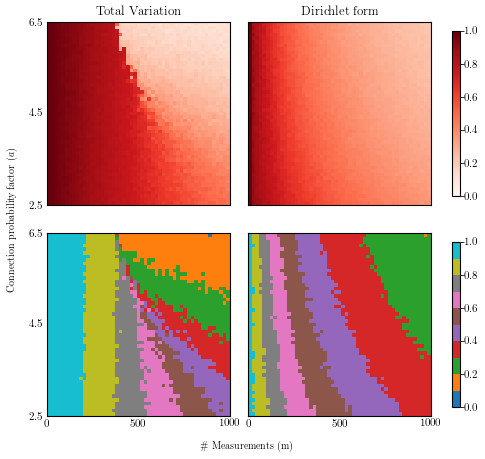

In [61]:
tv_experiment = utils.load_obj(os.path.join(experiment_path, "pt_2sbm_unif_samp_tv_interp.pkl"))
dirichlet_experiment = utils.load_obj(os.path.join(experiment_path, "pt_2sbm_unif_samp_dirichlet_interp.pkl"))

n_vertices = tv_experiment['n_vertices']
n_communities = tv_experiment['n_communities']
list_a = tv_experiment['rows']
a = np.median(list_a)
b = tv_experiment['b']

n_rows = 2
n_cols = 2
figsize = (7.4, 7.4)

fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize,
                       sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.1, 'wspace':0.1})

# Plot phase transitions

helper.set_cmap() # Reset to default colormap

helper.plot_sbm_pt(tv_experiment, ax=ax[0,0], with_colorbar=False)
ax[0,0].set(title='Total Variation', ylabel='', xlabel='')

helper.plot_sbm_pt(dirichlet_experiment, ax=ax[0,1], with_colorbar=False)
ax[0,1].set(title='Dirichlet form', ylabel='', xlabel='')

helper.set_cmap('quantized') # Set quantized colormap
 
helper.plot_sbm_pt(tv_experiment, ax=ax[1,0], with_colorbar=False)
ax[1,0].set(title='', ylabel='', xlabel='')

helper.plot_sbm_pt(dirichlet_experiment, ax=ax[1,1], with_colorbar=False)
ax[1,1].set(title='', ylabel='', xlabel='')

# Add colorbars
norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=False)
cmap = mpl.cm.get_cmap(name='Reds')
cb = plt.colorbar(mappable=mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
                  ax=ax[0,:],
                  fraction=0.02)

norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=False)
cmap = mpl.cm.get_cmap(name='tab10')
cb = plt.colorbar(mappable=mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                  ax=ax[1,:],
                  fraction=0.02)

# Add axes labels
fig.text(0.05, 0.5, r'Connection probability factor ($a$)', va='center', rotation='vertical')
fig.text(0.5, 0.07, '\# Measurements (m)', ha='center')

plt.savefig(save_path + 'pt_2sbm_unif_samp_tv_vs_dirichlet.pdf')

plt.show()

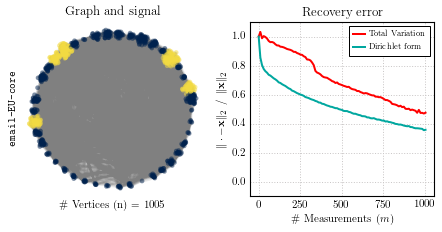

In [62]:
tv_experiment = utils.load_obj(os.path.join(experiment_path, "pt_email_eu_core_unif_samp_tv_interp.pkl"))
dirichlet_experiment = utils.load_obj(os.path.join(experiment_path, "pt_email_eu_core_unif_samp_dirichlet_interp.pkl"))

n_vertices = tv_experiment['n_vertices']
n_communities = tv_experiment['n_communities']
gt_signal = tv_experiment['gt_signal']
list_m = tv_experiment['cols']

graph, _ = gs.email_eu_core(path=os.path.join(cmd_folder, 'data/email-EU-core/'))

n_rows = 1
n_cols = 2
figsize = (7.4, 3.2)

fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize,
                       gridspec_kw={'hspace': 0.15, 'wspace':0.25})

# Plot graph
helper.set_cmap('signal')
plotting.plot_graph(graph, gt_signal, ax=ax[0], edges=True, colorbar=False)
ax[0].set(title='Graph and signal', 
          xlabel='\# Vertices (n) = {0}'.format(n_vertices), 
          ylabel=r'\texttt{email-EU-core}')

# Plot curves
helper.plot_line_pt(tv_experiment, 
                    ax=ax[1],
                    label='Total Variation', 
                    linewidth=2, 
                    color=epfl_colors['rouge'])

helper.plot_line_pt(dirichlet_experiment, 
                    ax=ax[1],
                    label='Dirichlet form', 
                    linewidth=2, 
                    color=epfl_colors['leman'])

ax[1].legend()
ax[1].set(title="Recovery error", 
          ylabel=r'$\|\cdot - \mathbf{x}\|_2 \enspace / \enspace \|\mathbf{x}\|_2$')

plt.savefig(save_path + 'pt_email_eu_core_unif_samp_tv_vs_dirichlet.pdf')

plt.show()

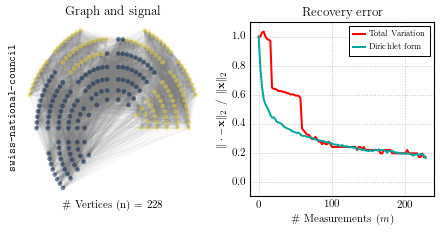

In [63]:
tv_experiment = utils.load_obj(os.path.join(experiment_path, "pt_snc_unif_samp_tv_interp.pkl"))
dirichlet_experiment = utils.load_obj(os.path.join(experiment_path, "pt_snc_unif_samp_dirichlet_interp.pkl"))

n_vertices = tv_experiment['n_vertices']
n_communities = tv_experiment['n_communities']
gt_signal = tv_experiment['gt_signal']
list_m = tv_experiment['cols']

graph, _ = gs.swiss_national_council(path=os.path.join(cmd_folder, 'data/swiss-national-council/'),
                                     **tv_experiment['nn_params'])

n_rows = 1
n_cols = 2
figsize = (7.4, 3.2)

fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize,
                       gridspec_kw={'hspace': 0.15, 'wspace':0.25})

# Plot graph
helper.set_cmap('signal')
plotting.plot_graph(graph, gt_signal, ax=ax[0], edges=True, colorbar=False)
ax[0].set(title='Graph and signal', 
          xlabel='\# Vertices (n) = {0}'.format(n_vertices), 
          ylabel=r'\texttt{swiss-national-council}')

# Plot curves
helper.plot_line_pt(tv_experiment, 
                    ax=ax[1],
                    label='Total Variation', 
                    linewidth=2, 
                    color=epfl_colors['rouge'])

helper.plot_line_pt(dirichlet_experiment, 
                    ax=ax[1],
                    label='Dirichlet form', 
                    linewidth=2, 
                    color=epfl_colors['leman'])

ax[1].legend()
ax[1].set(title="Recovery error", 
          ylabel=r'$\|\cdot - \mathbf{x}\|_2 \enspace / \enspace \|\mathbf{x}\|_2$')

plt.savefig(save_path + 'pt_snc_unif_samp_tv_vs_dirichlet.pdf')

plt.show()

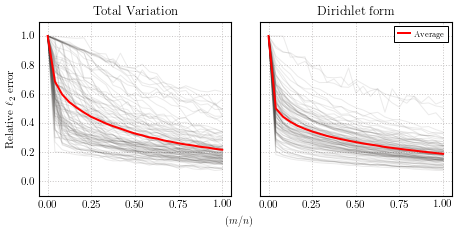

In [64]:
tv_experiment = utils.load_obj(os.path.join(experiment_path, "pt_bsds300_unif_samp_tv_interp.pkl"))
dirichlet_experiment = utils.load_obj(os.path.join(experiment_path, "pt_bsds300_unif_samp_dirichlet_interp.pkl"))

graph_type = tv_experiment['graph_type']
ids = tv_experiment['rows']
list_m = tv_experiment['cols']

n_rows = 1
n_cols = 2
figsize = (7.4, 3.2)

fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize,
                       sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.15, 'wspace':0.15})

for i in np.arange(len(ids)):
    ax[0].plot(list_m, tv_experiment['grid'][i, :], marker='', color=epfl_colors['ardoise'], linewidth=1, alpha=0.1)
    ax[1].plot(list_m, dirichlet_experiment['grid'][i, :], marker='', color=epfl_colors['ardoise'], linewidth=1, alpha=0.1)
    
# Highlight the averages 
ax[0].plot(list_m, np.mean(tv_experiment['grid'], axis=0), label='Average', marker='', color=epfl_colors['rouge'], linewidth=2)
ax[1].plot(list_m, np.mean(dirichlet_experiment['grid'], axis=0), label='Average', marker='', color=epfl_colors['rouge'], linewidth=2)

ax[0].set(title='Total Variation', xlabel='', ylabel=r'Relative $\ell_2$ error')
ax[1].set(title='Dirichlet form', xlabel='')

ax[0].set_ylim(bottom=-0.1, top=1.1)
ax[1].set_ylim(bottom=-0.1, top=1.1)

ax[1].legend()

# Add axes labels
fig.text(0.5, 0.0, r'$(m/n)$', ha='center')

plt.savefig(save_path + 'pt_bsds300_unif_samp_tv_vs_dirichlet.pdf')

plt.show()

# PT SSBM

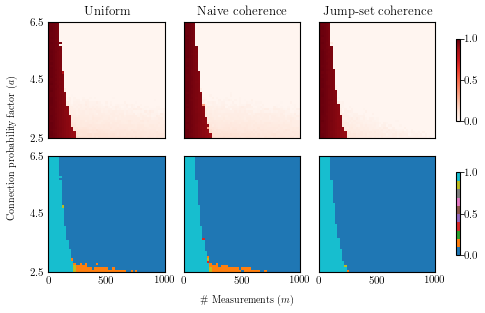

In [65]:
unif_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_2ssbm_unif_samp_tv_interp.pkl"))
naive_coherence_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_2ssbm_naive_coherence_samp_tv_interp.pkl"))
jump_set_coherence_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_2ssbm_jump_set_coherence_samp_tv_interp.pkl"))

n_vertices = unif_samp_tv_interp['n_vertices']
n_communities = unif_samp_tv_interp['n_communities']
list_a = unif_samp_tv_interp['rows']
a = np.median(list_a)
b = unif_samp_tv_interp['b']

n_rows = 2
n_cols = 3
figsize = (7.4, 4.6)

fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize,
                       sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.15, 'wspace':0.15})

# Plot phase transitions

helper.set_cmap() # Reset to default colormap

helper.plot_sbm_pt(unif_samp_tv_interp, ax=ax[0,0], with_colorbar=False)
ax[0,0].set(title='Uniform', xlabel='', ylabel='')

helper.plot_sbm_pt(naive_coherence_samp_tv_interp, ax=ax[0,1], with_colorbar=False)
ax[0,1].set(title='Naive coherence', ylabel='', xlabel='')

helper.plot_sbm_pt(jump_set_coherence_samp_tv_interp, ax=ax[0,2], with_colorbar=False)
ax[0,2].set(title='Jump-set coherence', ylabel='', xlabel='')

helper.set_cmap('quantized') # Set quantized colormap
 
helper.plot_sbm_pt(unif_samp_tv_interp, ax=ax[1,0], with_colorbar=False)
ax[1,0].set(title='', ylabel='', xlabel='')

helper.plot_sbm_pt(naive_coherence_samp_tv_interp, ax=ax[1,1], with_colorbar=False)
ax[1,1].set(title='', ylabel='', xlabel='')

helper.plot_sbm_pt(jump_set_coherence_samp_tv_interp, ax=ax[1,2], with_colorbar=False)
ax[1,2].set(title='', ylabel='', xlabel='')

# Add colorbars
norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=False)
cmap = mpl.cm.get_cmap(name='Reds')
cb = plt.colorbar(mappable=mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
                  ax=ax[0,:],
                  fraction=0.01)

norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=False)
cmap = mpl.cm.get_cmap(name='tab10')
cb = plt.colorbar(mappable=mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                  ax=ax[1,:],
                  fraction=0.01)

# Add axes labels
fig.text(0.05, 0.5, r'Connection probability factor ($a$)', va='center', rotation='vertical')
fig.text(0.5, 0.03, r'\# Measurements ($m$)', ha='center')

plt.savefig(save_path + 'pt_2ssbm_tv_interp.pdf')

plt.show()

# PT SBM 

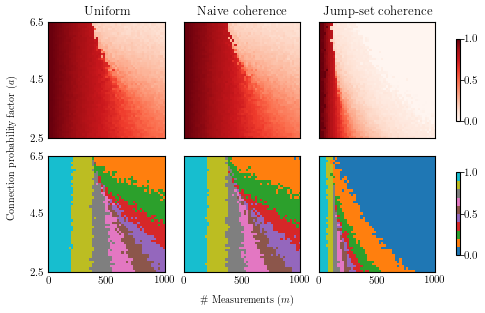

In [66]:
unif_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_2sbm_unif_samp_tv_interp.pkl"))
naive_coherence_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_2sbm_naive_coherence_samp_tv_interp.pkl"))
jump_set_coherence_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_2sbm_jump_set_coherence_samp_tv_interp.pkl"))

n_vertices = unif_samp_tv_interp['n_vertices']
n_communities = unif_samp_tv_interp['n_communities']
list_a = unif_samp_tv_interp['rows']
a = np.median(list_a)
b = unif_samp_tv_interp['b']

n_rows = 2
n_cols = 3
figsize = (7.4, 4.6)

fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize,
                       sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.15, 'wspace':0.15})

# Plot phase transitions

helper.set_cmap() # Reset to default colormap

helper.plot_sbm_pt(unif_samp_tv_interp, ax=ax[0,0], with_colorbar=False)
ax[0,0].set(title='Uniform', xlabel='', ylabel='')

helper.plot_sbm_pt(naive_coherence_samp_tv_interp, ax=ax[0,1], with_colorbar=False)
ax[0,1].set(title='Naive coherence', ylabel='', xlabel='')

helper.plot_sbm_pt(jump_set_coherence_samp_tv_interp, ax=ax[0,2], with_colorbar=False)
ax[0,2].set(title='Jump-set coherence', ylabel='', xlabel='')

helper.set_cmap('quantized') # Set quantized colormap
 
helper.plot_sbm_pt(unif_samp_tv_interp, ax=ax[1,0], with_colorbar=False)
ax[1,0].set(title='', ylabel='', xlabel='')

helper.plot_sbm_pt(naive_coherence_samp_tv_interp, ax=ax[1,1], with_colorbar=False)
ax[1,1].set(title='', ylabel='', xlabel='')

helper.plot_sbm_pt(jump_set_coherence_samp_tv_interp, ax=ax[1,2], with_colorbar=False)
ax[1,2].set(title='', ylabel='', xlabel='')

# Add colorbars
norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=False)
cmap = mpl.cm.get_cmap(name='Reds')
cb = plt.colorbar(mappable=mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
                  ax=ax[0,:],
                  fraction=0.01)

norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=False)
cmap = mpl.cm.get_cmap(name='tab10')
cb = plt.colorbar(mappable=mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                  ax=ax[1,:],
                  fraction=0.01)

# Add axes labels
fig.text(0.05, 0.5, r'Connection probability factor ($a$)', va='center', rotation='vertical')
fig.text(0.5, 0.03, r'\# Measurements ($m$)', ha='center')

plt.savefig(save_path + 'pt_2sbm_tv_interp.pdf')

plt.show()

# PT email-EU-core

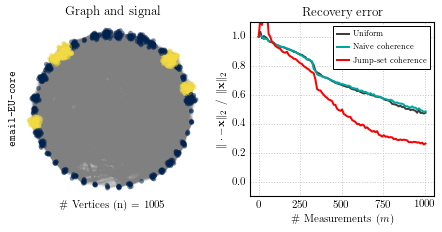

In [67]:
unif_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_email_eu_core_unif_samp_tv_interp.pkl"))
naive_coherence_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_email_eu_core_naive_coherence_samp_tv_interp.pkl"))
jump_set_coherence_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_email_eu_core_jump_set_coherence_samp_tv_interp.pkl"))

n_vertices = unif_samp_tv_interp['n_vertices']
n_communities = unif_samp_tv_interp['n_communities']
gt_signal = unif_samp_tv_interp['gt_signal']
list_m = unif_samp_tv_interp['cols']

graph, _ = gs.email_eu_core(path=os.path.join(cmd_folder, 'data/email-EU-core/'))

n_rows = 1
n_cols = 2
figsize = (7.4, 3.2)

helper.set_cmap('signal')
fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize,
                       gridspec_kw={'hspace': 0.15, 'wspace':0.25})

# Plot graph
plotting.plot_graph(graph, gt_signal, ax=ax[0], edges=True, colorbar=False)
ax[0].set(title='Graph and signal', 
          xlabel='\# Vertices (n) = {0}'.format(n_vertices), 
          ylabel=r'\texttt{email-EU-core}')

# Plot curves
helper.plot_line_pt(unif_samp_tv_interp, 
                    ax=ax[1],
                    label='Uniform', 
                    linewidth=2, 
                    color=epfl_colors['ardoise'])

helper.plot_line_pt(naive_coherence_samp_tv_interp, 
                    ax=ax[1],
                    label='Naive coherence', 
                    linewidth=2, 
                    color=epfl_colors['leman'])

helper.plot_line_pt(jump_set_coherence_samp_tv_interp, 
                    ax=ax[1],
                    label='Jump-set coherence', 
                    linewidth=2, 
                    color=epfl_colors['rouge'])

ax[1].legend()
ax[1].set(title="Recovery error", ylabel=r'$\|\cdot - \mathbf{x}\|_2 \enspace / \enspace \|\mathbf{x}\|_2$')

plt.savefig(save_path + 'pt_email_eu_core_tv_interp.pdf')

plt.show()

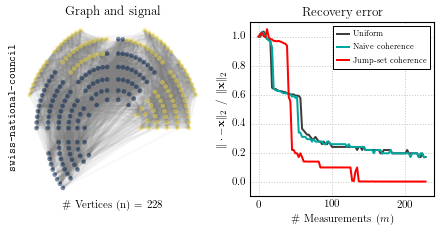

In [68]:
unif_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_snc_unif_samp_tv_interp.pkl"))
unif_samp_dirichlet_interp = utils.load_obj(os.path.join(experiment_path, "pt_snc_unif_samp_dirichlet_interp.pkl"))
naive_coherence_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_snc_naive_coherence_samp_tv_interp.pkl"))
jump_set_coherence_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_snc_jump_set_coherence_samp_tv_interp.pkl"))

n_vertices = unif_samp_tv_interp['n_vertices']
n_communities = unif_samp_tv_interp['n_communities']
gt_signal = unif_samp_tv_interp['gt_signal']
list_m = unif_samp_tv_interp['cols']
nn_params = unif_samp_tv_interp['nn_params']

graph, _ = gs.swiss_national_council(path=os.path.join(cmd_folder, 'data/swiss-national-council/'),
                                     **nn_params)
n_rows = 1
n_cols = 2
figsize = (7.4, 3.2)

helper.set_cmap('signal')
fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize,
                       gridspec_kw={'hspace': 0.15, 'wspace':0.25})

# Plot graph
plotting.plot_graph(graph, gt_signal, ax=ax[0], edges=True, colorbar=False)
ax[0].set(title='Graph and signal', 
          xlabel='\# Vertices (n) = {0}'.format(n_vertices), 
          ylabel=r'\texttt{swiss-national-council}')

# Plot curves
helper.plot_line_pt(unif_samp_tv_interp, 
                    ax=ax[1],
                    label='Uniform', 
                    linewidth=2, 
                    color=epfl_colors['ardoise'])

helper.plot_line_pt(naive_coherence_samp_tv_interp, 
                    ax=ax[1],
                    label='Naive coherence', 
                    linewidth=2, 
                    color=epfl_colors['leman'])

helper.plot_line_pt(jump_set_coherence_samp_tv_interp, 
                    ax=ax[1],
                    label='Jump-set coherence', 
                    linewidth=2, 
                    color=epfl_colors['rouge'])

ax[1].legend()
ax[1].set(title="Recovery error", ylabel=r'$\|\cdot - \mathbf{x}\|_2 \enspace / \enspace \|\mathbf{x}\|_2$')

plt.savefig(save_path + 'pt_snc_tv_interp.pdf')

plt.show()

# PT BSDS300 plot

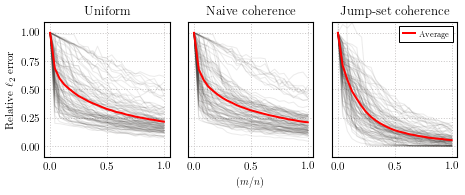

In [69]:
path = 'data/curated/'

unif_samp_tv_interp = utils.load_obj(os.path.join(path, "pt_bsds300_unif_samp_tv_interp.pkl"))
unif_samp_dirichlet_interp = utils.load_obj(os.path.join(path, "pt_bsds300_unif_samp_dirichlet_interp.pkl"))
naive_coherence_samp_tv_interp = utils.load_obj(os.path.join(path, "pt_bsds300_naive_coherence_samp_tv_interp.pkl"))
jump_set_coherence_samp_tv_interp = utils.load_obj(os.path.join(path, "pt_bsds300_jump_set_coherence_samp_tv_interp.pkl"))

graph_type = unif_samp_tv_interp['graph_type']
ids = unif_samp_tv_interp['rows']
list_m = unif_samp_tv_interp['cols']

n_rows = 1
n_cols = 3
figsize = (7.4, 2.5)

fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize,
                       sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.15, 'wspace':0.15})

for i in np.arange(len(ids)):
    ax[0].plot(list_m, unif_samp_tv_interp['grid'][i, :], marker='', color=epfl_colors['ardoise'], linewidth=1, alpha=0.1)
    ax[1].plot(list_m, naive_coherence_samp_tv_interp['grid'][i, :], marker='', color=epfl_colors['ardoise'], linewidth=1, alpha=0.1)
    ax[2].plot(list_m, jump_set_coherence_samp_tv_interp['grid'][i, :], marker='', color=epfl_colors['ardoise'], linewidth=1, alpha=0.1)
    
# Highlight the averages 
ax[0].plot(list_m, np.mean(unif_samp_tv_interp['grid'], axis=0), label='Average', marker='', color=epfl_colors['rouge'], linewidth=2)
ax[1].plot(list_m, np.mean(naive_coherence_samp_tv_interp['grid'], axis=0), label='Average', marker='', color=epfl_colors['rouge'], linewidth=2)
ax[2].plot(list_m, np.mean(jump_set_coherence_samp_tv_interp['grid'], axis=0), label='Average', marker='', color=epfl_colors['rouge'], linewidth=2)

ax[0].set(title='Uniform', xlabel='', ylabel=r'Relative $\ell_2$ error')
ax[1].set(title='Naive coherence', xlabel='')
ax[2].set(title='Jump-set coherence', xlabel='')

ax[0].set_ylim(bottom=-0.1, top=1.1)
ax[1].set_ylim(bottom=-0.1, top=1.1)
ax[2].set_ylim(bottom=-0.1, top=1.1)

ax[2].legend()

# Add axes labels
fig.text(0.51, -0.03, r'$(m/n)$', ha='center')

plt.savefig(save_path + 'pt_bsds300_tv_interp.pdf')

plt.show()

In [73]:
# Get image ids with smallest and largest recovery errors

idx_min = ids[np.argmin(jump_set_coherence_samp_tv_interp['grid'][:,-1])]
idx_max = ids[np.argmax(jump_set_coherence_samp_tv_interp['grid'][:,-1])]

from glob import glob, iglob

img_file_min = glob(os.path.join(cmd_folder, 'data/BSDS300/images/**/' + idx_min +'.jpg'), recursive=True)[0]
img_min = plt.imread(img_file_min)

img_file_max = glob(os.path.join(cmd_folder, 'data/BSDS300/images/**/' + idx_max +'.jpg'), recursive=True)[0]
img_max = plt.imread(img_file_max)

graph_min, _ = gs.bsds300(img_id=idx_min, 
                          path=os.path.join(cmd_folder, 'data/BSDS300/'),
                          graph_type=tv_experiment['graph_type'],
                          k=3, 
                          use_flann=True)

gt_signal_min = graph_min.info['node_com']

graph_max, _ = gs.bsds300(img_id=idx_max, 
                          path=os.path.join(cmd_folder, 'data/BSDS300/'),
                          graph_type=tv_experiment['graph_type'],
                          k=3, 
                          use_flann=True)

gt_signal_max = graph_max.info['node_com']

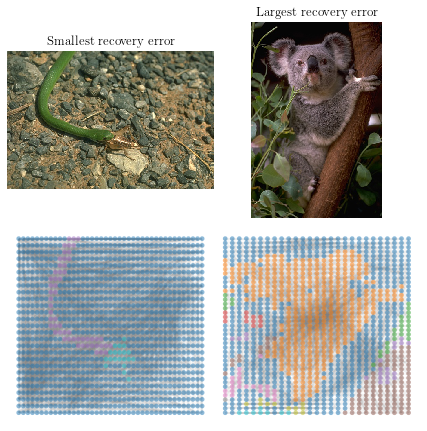

In [119]:
n_rows = 2
n_cols = 2
figsize = (7.4, 7.4)

fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize,
                       gridspec_kw={'hspace': 0.05, 'wspace':0.0})

helper.set_cmap('quantized')
ax[0,0].imshow(img_min, origin='upper')
ax[0,0].axis(False)
plotting.plot_graph(graph_min, gt_signal_min, ax=ax[1,0], colorbar=False)
ax[0,0].set(title='Smallest recovery error')

ax[0,1].imshow(img_max, origin='upper')
ax[0,1].axis(False)
plotting.plot_graph(graph_max, gt_signal_max, ax=ax[1,1], colorbar=False)
ax[0,1].set(title='Largest recovery error')

plt.savefig(save_path + 'bsds300_imgs_smallest_largest_error.pdf')

plt.show()

In [ ]:
import sampling as smp
import recovery as rec

n_vertices = 1000
a, b = (6.5, .5)
graph, indicator_vectors = gs.sbm(n_vertices, 2, n_vert_per_comm=[200, 800], intra_comm_prob=a * np.log(n_vertices)/n_vertices, inter_comm_prob=b * np.log(n_vertices)/n_vertices)
gt_signal = indicator_vectors[0,:]

smp_design = lambda g, m: smp.uniform_vertex(g, m, replace=True)

m = int(0.6 * graph.n_vertices)

sampled_vertices = smp_design(graph, m)
sampled_values = gt_signal[sampled_vertices]

y = utils.nan_off_sample(graph.n_vertices, sampled_vertices, sampled_values)

rtol = 1e-6 * (graph.n_vertices ** (-1/2))
maxit = 5000
verbosity = 'LOW'
rec_fun = lambda g, s_ver, s_val: rec.tv_interpolation(g, s_ver, s_val, rtol=rtol, maxit=maxit, verbosity=verbosity)

rec_vec, rel_err = utils.standard_pipeline(graph, gt_signal, m, smp_design, rec_fun)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

limits = [min(gt_signal), max(gt_signal)]
s_cut = np.sum(np.abs(graph.grad(gt_signal)) > 1e-6).astype(int)

plotting.plot_graph(graph, 
                    gt_signal, 
                    ax=ax, 
                    limits=limits, 
                    edges=True, 
                    colorbar=False)

ax.set(title=r'Ground-truth ($|S| = {0}$)'.format(s_cut),
       ylabel='\# vertices (n) = {0}'.format(n_vertices))

plt.savefig('ground-truth-signal.pdf')

plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

plotting.plot_graph(graph, 
                    y, 
                    ax=ax, 
                    limits=limits, 
                    edges=True, 
                    colorbar=False)

ax.set(title='Samples (m = {0})'.format(m))

plt.savefig('subsampled-signal.pdf')

plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

plotting.plot_graph(graph, 
                    rec_vec, 
                    ax=ax, 
                    limits=limits, 
                    edges=True, 
                    colorbar=False)

ax.set(title='Recovery (rel. err. = {0:.2f})'.format(rel_err))

plt.savefig('recovered-signal.pdf')

plt.show()